<a href="https://colab.research.google.com/github/pbitgomes/inconsistencias_sisaud/blob/main/inconsistencias_sisaud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importar Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Atividades sem demanda ou sem planejamento

In [69]:
df_dem_planej = pd.read_excel('/content/233_Ticket-1134988_Atividades_Tarefa_Demanda_Planejamento_Fases_Paula_COGEA.xlsx')
#df_dem_planej.info()

In [70]:
df_dem_planej.columns

Index(['CO_SEQ_ATIVIDADE_TECNICA', 'Nº_Atividade', 'Tipo_de_Atividade',
       'Número do Planejamento', 'Lotação_Programação_ATV',
       'Data_Programação1', 'Data_Programação2', 'Data_de_Encerramento',
       'Ano_encerramento', 'Objeto', 'DT_Cadastro_Demanda', 'Nº_DEMANDA',
       'DT_Cadastro_Tarefa', 'Nº_TAREFA', 'Tipo_de_Fase', 'Fase_Executada?',
       'Qtd. membros', 'Data_de_Início', 'Data_de_Fim', 'Tempo (dias)',
       'UF_PRESTADOR', 'MUNICIPIO_PRESTADOR'],
      dtype='object')

In [110]:
# Criar novo dataframe com as colunas relevantes para a análise do planejamento
df_planej = df_dem_planej.drop(columns=['Nº_Atividade', 'Tipo_de_Atividade',
       'Lotação_Programação_ATV', 'Data_Programação1', 'Data_Programação2', 'Data_de_Encerramento',
       'Objeto', 'DT_Cadastro_Demanda', 'Nº_DEMANDA', 'DT_Cadastro_Tarefa', 'Nº_TAREFA', 'Tipo_de_Fase', 'Fase_Executada?',
       'Qtd. membros', 'Data_de_Início', 'Data_de_Fim', 'Tempo (dias)','UF_PRESTADOR', 'MUNICIPIO_PRESTADOR'])

# Retirar as atividades encerradas em 2017 (fora do escopo)
df_planej = df_planej.loc[df_dem_planej[df_dem_planej['Ano_encerramento'] != 2017].index]

# Excluir linhas duplicadas
df_planej.drop_duplicates(inplace=True)

In [112]:
# Criar novo dataframe com as colunas relevantes para a análise da demanda
df_dem = df_dem_planej.drop(columns=['Nº_Atividade', 'Tipo_de_Atividade','Número do Planejamento', 'Lotação_Programação_ATV',
       'Data_Programação1', 'Data_Programação2', 'Data_de_Encerramento','Objeto', 'DT_Cadastro_Demanda','DT_Cadastro_Tarefa', 'Nº_TAREFA',
       'Tipo_de_Fase', 'Fase_Executada?','Qtd. membros', 'Data_de_Início', 'Data_de_Fim', 'Tempo (dias)', 'UF_PRESTADOR', 'MUNICIPIO_PRESTADOR'])

# Retirar as atividades encerradas em 2017 (fora do escopo)
df_dem = df_dem.loc[df_dem_planej[df_dem_planej['Ano_encerramento'] != 2017].index]

# Excluir linhas duplicadas
df_dem.drop_duplicates(inplace=True)

In [123]:
sem_demanda = df_dem['Nº_DEMANDA'].isna().sum()
print(f"Atividades sem demanda': {sem_demanda}")

sem_planej = df_planej['Número do Planejamento'].isna().sum()
print(f"Atividades sem planejamento': {sem_planej}")

Atividades sem demanda': 5
Atividades sem planejamento': 145


## Atividades sem planejamento

In [118]:
df_planej.columns

Index(['CO_SEQ_ATIVIDADE_TECNICA', 'Número do Planejamento',
       'Ano_encerramento'],
      dtype='object')

In [128]:
df_planej.drop(columns=['CO_SEQ_ATIVIDADE_TECNICA',], inplace=True)
df_planej

,Número do Planejamento,Ano_encerramento
0,12262.0,2018
1,19680.0,2018
21,12806.0,2018
51,19684.0,2018
58,19759.0,2019
...,...,...
8491,104292.0,2023
8494,103315.0,2023
8497,104571.0,2023
8500,104570.0,2023


In [129]:
df_planej.groupby('Ano_encerramento').apply(lambda x: x.isna().sum())

<ipython-input-129-1002772dbd85>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_planej.groupby('Ano_encerramento').apply(lambda x: x.isna().sum())


,Número do Planejamento,Ano_encerramento
Ano_encerramento,,
2018,37,0
2019,8,0
2020,1,0
2021,19,0
2022,77,0
2023,3,0


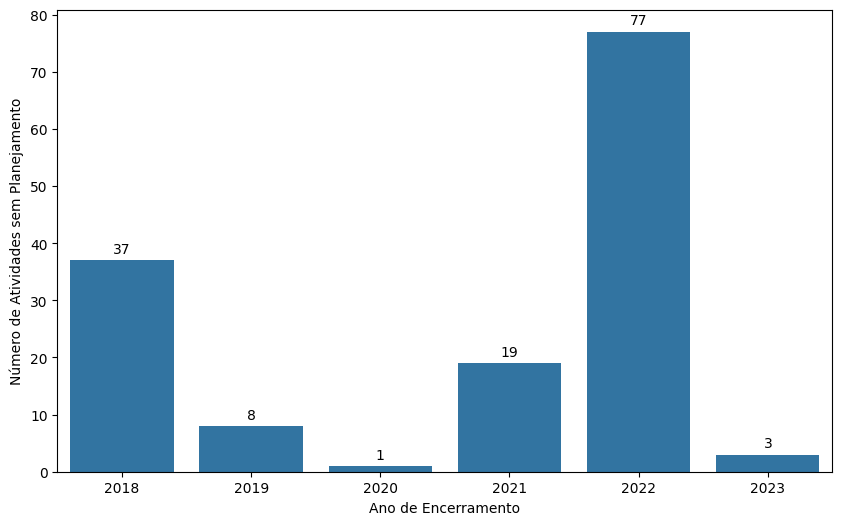

In [131]:
# Quantidade de atividades sem planejamento
ativ_sem_planej = df_planej.groupby('Ano_encerramento')['Número do Planejamento'].apply(lambda x: x.isna().sum())

# Create a bar graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ativ_sem_planej.index, y=ativ_sem_planej.values)
#plt.title('Número de Atividades sem Planejamento por Ano')
plt.xlabel('Ano de Encerramento')
plt.ylabel('Número de Atividades sem Planejamento')

# Exibir valores nas barras
for container in ax.containers:
    ax.bar_label(container, padding=3)  # Exibir valores com duas casas decimais

# salvar o gráfico em uma figura
plt.savefig('ativ_sem_planej.png', format='png')

# Fases da Atividade

In [1]:
# Análise feita no Excel
fases = {
    'Tipo_fase': ['Fase Analítica', 'Fase Operativa', 'Fase de Relatório Final'],
    'Nº de Atividades sem essa Fase': [20, 459, 50],
    'Nº de Atividades com mais de uma Fase desse Tipo': [183, 173, 451]}

df_fases = pd.DataFrame(fases)
df_fases

NameError: name 'pd' is not defined

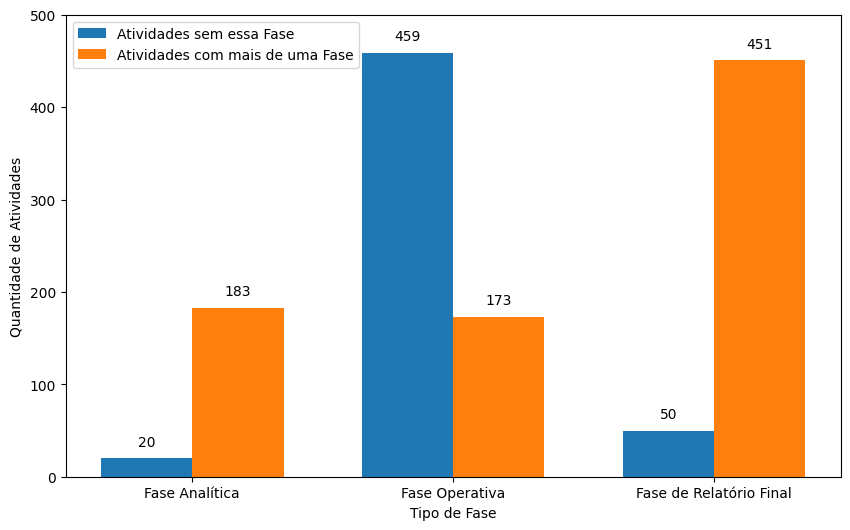

In [147]:
# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))

# Largura das barras
bar_width = 0.35
index = range(len(df_fases))

# Plotar as barras
bars1 = plt.bar(index, df_fases['Nº de Atividades sem essa Fase'], bar_width, label='Atividades sem essa Fase')
bars2 = plt.bar([i + bar_width for i in index], df_fases['Nº de Atividades com mais de uma Fase desse Tipo'], bar_width, label='Atividades com mais de uma Fase')

# Adicionar os valores acima das barras
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)

# Definir o limite máximo do eixo Y
plt.ylim(0, 500)

# Adicionar título e rótulos aos eixos
#plt.title('Comparação de Atividades por Tipo de Fase')
plt.xlabel('Tipo de Fase')
plt.ylabel('Quantidade de Atividades')

# Configurar o eixo x para mostrar os tipos de fases
plt.xticks([i + bar_width / 2 for i in index], df_fases['Tipo_fase'], rotation=0)

# Exibir a legenda
plt.legend()

# salvar o gráfico em uma figura
plt.savefig('fases.png', format='png');

# Período de tempo entre o final da fase de relatório final e o encerramento da auditoria

In [158]:
df = pd.read_excel('relatorio_encerramento.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CO_SEQ_ATIVIDADE_TECNICA  1588 non-null   int64         
 1   Nº_Atividade              1588 non-null   int64         
 2   Tipo_de_Atividade         1588 non-null   object        
 3   Número do Planejamento    1452 non-null   float64       
 4   Lotação_Programação_ATV   1588 non-null   object        
 5   Data_Programação1         1588 non-null   datetime64[ns]
 6   Data_Programação2         1588 non-null   datetime64[ns]
 7   Data_de_Encerramento      1588 non-null   datetime64[ns]
 8   Ano_encerramento          1588 non-null   int64         
 9   Objeto                    1588 non-null   object        
 10  DT_Cadastro_Demanda       1584 non-null   datetime64[ns]
 11  Nº_DEMANDA                1584 non-null   float64       
 12  DT_Cadastro_Tarefa  

In [159]:
# Criar df apenas com as informações da fase de relatório e encerramento
df_encerramento = df[['Nº_Atividade', 'Data_de_Encerramento', 'Data_de_Fim', 'Tempo (dias)']]
df_encerramento.head(3)

,Nº_Atividade,Data_de_Encerramento,Data_de_Fim,Tempo (dias)
0,13876,2018-02-22 16:19:50,2018-01-19,34.680440
1,14073,2018-02-28 16:39:54,2018-01-26,33.694375
2,15026,2018-09-27 19:59:08,2018-06-08,111.832731


In [160]:
df_encerramento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nº_Atividade          1588 non-null   int64         
 1   Data_de_Encerramento  1588 non-null   datetime64[ns]
 2   Data_de_Fim           1588 non-null   datetime64[ns]
 3   Tempo (dias)          1588 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 49.8 KB


In [161]:
# Criar coluna com a quantidade de dias entre o final da análise e o encerramento
df_encerramento['diferenca_dias'] = (df['Data_de_Encerramento'] - df['Data_de_Fim']).dt.days
df_encerramento.head()

<ipython-input-161-f993e9c725b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encerramento['diferenca_dias'] = (df['Data_de_Encerramento'] - df['Data_de_Fim']).dt.days


,Nº_Atividade,Data_de_Encerramento,Data_de_Fim,Tempo (dias),diferenca_dias
0,13876,2018-02-22 16:19:50,2018-01-19,34.680440,34
1,14073,2018-02-28 16:39:54,2018-01-26,33.694375,33
2,15026,2018-09-27 19:59:08,2018-06-08,111.832731,111
3,15036,2019-08-15 08:58:37,2019-06-14,62.374039,62
4,15120,2019-07-18 15:37:33,2019-05-17,62.651076,62


In [162]:
df_encerramento['diferenca_dias'].describe()

,diferenca_dias
count,1588.000000
mean,76.027708
std,106.962197
min,0.000000
25%,38.000000
50%,55.000000
75%,75.000000
max,1726.000000


In [163]:
# Calcular os quartis (25%, 50%, 75%) manualmente
q1 = df_encerramento['diferenca_dias'].quantile(0.25)
q2 = df_encerramento['diferenca_dias'].quantile(0.50)  # ou df['diferenca_dias'].median()
q3 = df_encerramento['diferenca_dias'].quantile(0.75)

print(f"Q1 (25%): {q1}")
print(f"Q2 (50% - Mediana): {q2}")
print(f"Q3 (75%): {q3}")

Q1 (25%): 38.0
Q2 (50% - Mediana): 55.0
Q3 (75%): 75.0


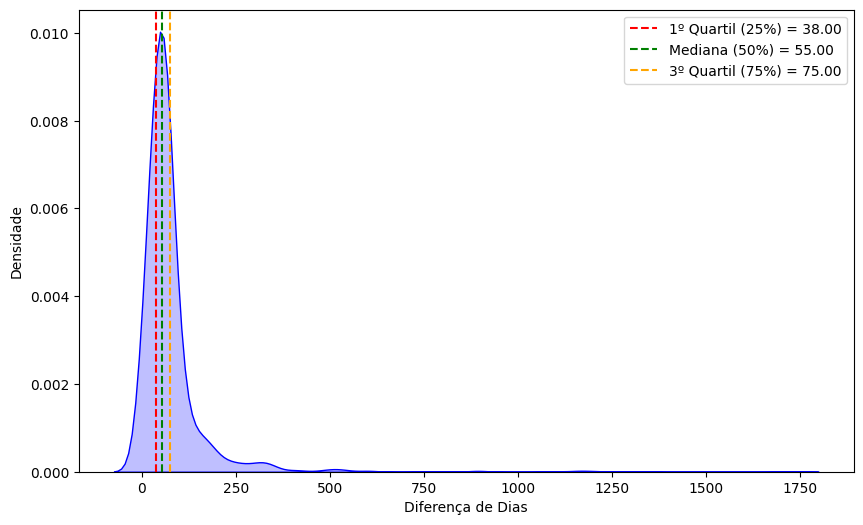

In [164]:
# coluna com os dados
diferenca_dias = df_encerramento['diferenca_dias']

# Calcular os quartis
q1 = np.percentile(diferenca_dias, 25)
q2 = np.percentile(diferenca_dias, 50)  # Também a mediana
q3 = np.percentile(diferenca_dias, 75)

# Plotar a curva de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(diferenca_dias, fill=True, color="blue")

# Adicionar os quartis ao gráfico
plt.axvline(q1, color='red', linestyle='--', label=f"1º Quartil (25%) = {q1:.2f}")
plt.axvline(q2, color='green', linestyle='--', label=f"Mediana (50%) = {q2:.2f}")
plt.axvline(q3, color='orange', linestyle='--', label=f"3º Quartil (75%) = {q3:.2f}")

# Customizar o gráfico
#plt.title("Distribuição com Quartis da Diferença de Dias")
plt.xlabel("Diferença de Dias")
plt.ylabel("Densidade")
plt.legend()

# salvar o gráfico em uma figura
plt.savefig('dist_dias.png', format='png')

In [165]:
# Calcular Q1 (25%), Q3 (75%) e o IQR
Q1 = df_encerramento['diferenca_dias'].quantile(0.25)
Q3 = df_encerramento['diferenca_dias'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_encerramento[(df_encerramento['diferenca_dias'] < limite_inferior) | (df_encerramento['diferenca_dias'] > limite_superior)]

print("Outliers identificados:")
print(outliers)

Outliers identificados:
      Nº_Atividade Data_de_Encerramento Data_de_Fim  Tempo (dias)  \
6            15407  2019-02-28 15:14:46  2018-10-05    146.635255   
9            15702  2019-06-07 08:13:46  2018-01-12    511.342894   
10           15706  2019-07-12 09:42:51  2018-01-12    546.404757   
11           15753  2019-02-05 07:56:34  2016-01-29   1103.330949   
12           15873  2021-03-09 17:22:11  2018-01-05   1159.723738   
...            ...                  ...         ...           ...   
1459         19397  2023-11-16 16:19:52  2023-06-14    155.680463   
1485         19428  2023-06-16 00:10:13  2022-10-11    248.007095   
1503         19453  2023-10-17 10:03:37  2023-05-31    139.419178   
1521         19474  2023-09-22 18:57:35  2023-04-28    147.789988   
1522         19475  2023-10-06 15:06:17  2023-05-26    133.629363   

      diferenca_dias  
6                146  
9                511  
10               546  
11              1103  
12              1159  
...      

Explicação:
Q1: Primeiro quartil (25%).
Q3: Terceiro quartil (75%).
IQR: A diferença entre o terceiro e o primeiro quartil.
Outliers: Valores menores que
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR ou maiores que
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR.

In [166]:
# Remover outliers
df_sem_outliers = df_encerramento[(df_encerramento['diferenca_dias'] >= limite_inferior) & (df_encerramento['diferenca_dias'] <= limite_superior)]

# Exibir o DataFrame sem outliers
df_sem_outliers.head()

,Nº_Atividade,Data_de_Encerramento,Data_de_Fim,Tempo (dias),diferenca_dias
0,13876,2018-02-22 16:19:50,2018-01-19,34.680440,34
1,14073,2018-02-28 16:39:54,2018-01-26,33.694375,33
2,15026,2018-09-27 19:59:08,2018-06-08,111.832731,111
3,15036,2019-08-15 08:58:37,2019-06-14,62.374039,62
4,15120,2019-07-18 15:37:33,2019-05-17,62.651076,62


In [167]:
df_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 1587
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nº_Atividade          1422 non-null   int64         
 1   Data_de_Encerramento  1422 non-null   datetime64[ns]
 2   Data_de_Fim           1422 non-null   datetime64[ns]
 3   Tempo (dias)          1422 non-null   float64       
 4   diferenca_dias        1422 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 66.7 KB


In [168]:
# Análise estatística dos outliers
outliers['diferenca_dias'].describe()

,diferenca_dias
count,166.000000
mean,281.469880
std,238.220821
min,132.000000
25%,158.500000
50%,195.000000
75%,306.750000
max,1726.000000


In [169]:
# Análise estatística sem outliers
df_sem_outliers['diferenca_dias'].describe()

,diferenca_dias
count,1422.000000
mean,52.045007
std,26.112773
min,0.000000
25%,34.250000
50%,53.000000
75%,67.000000
max,130.000000


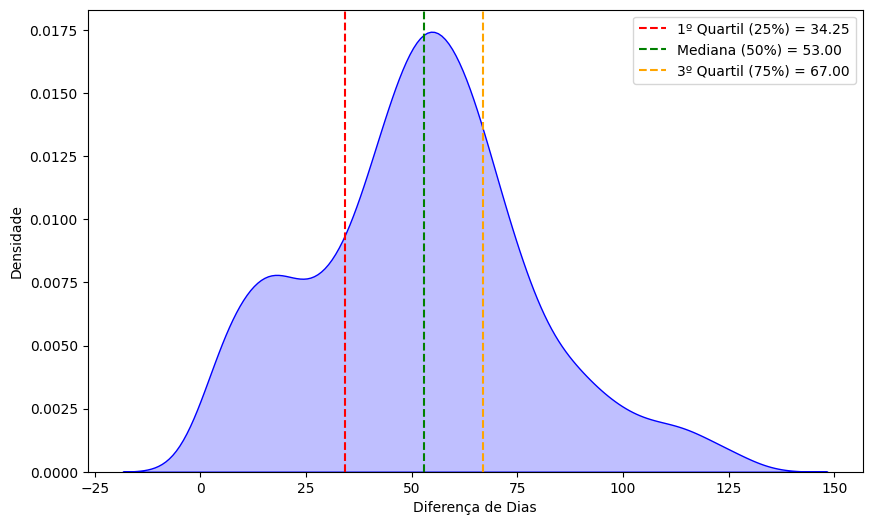

In [170]:
# dados
diferenca_dias = df_sem_outliers['diferenca_dias']

# Calcular os quartis
q1 = np.percentile(diferenca_dias, 25)
q2 = np.percentile(diferenca_dias, 50)  # Também a mediana
q3 = np.percentile(diferenca_dias, 75)

# Plotar a curva de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(diferenca_dias, fill=True, color="blue")

# Adicionar os quartis ao gráfico
plt.axvline(q1, color='red', linestyle='--', label=f"1º Quartil (25%) = {q1:.2f}")
plt.axvline(q2, color='green', linestyle='--', label=f"Mediana (50%) = {q2:.2f}")
plt.axvline(q3, color='orange', linestyle='--', label=f"3º Quartil (75%) = {q3:.2f}")

# Customizar o gráfico
#plt.title("Distribuição com Quartis da Diferença de Dias (sem outliers)")
plt.xlabel("Diferença de Dias")
plt.ylabel("Densidade")
plt.legend()

# salvar o gráfico em uma figura
plt.savefig('dist_dias_sem_outliers.png', format='png')

In [171]:
# Calcular a variância da coluna 'diferenca_dias'
variancia = df_encerramento['diferenca_dias'].var()

print(f"A variância da coluna 'diferenca_dias' é: {variancia}")

A variância da coluna 'diferenca_dias' é: 11440.911645152122


In [172]:
# Calcular o desvio padrão da coluna 'diferenca_dias'
desvio_padrao = df_encerramento['diferenca_dias'].std()

print(f"O desvio padrão da coluna 'diferenca_dias' é: {desvio_padrao}")

O desvio padrão da coluna 'diferenca_dias' é: 106.96219727152263


## Códigos não usados

In [ ]:
#diferenca_dias = df_encerramento['diferenca_dias']

# Calcular os quartis
#Q1 = np.percentile(diferenca_dias, 25)
#Q3 = np.percentile(diferenca_dias, 75)
#IQR = Q3 - Q1

# Limites para os outliers
#limite_inferior = Q1 - 1.5 * IQR
#limite_superior = Q3 + 1.5 * IQR

# Identificar os outliers
#outliers = diferenca_dias[(diferenca_dias < limite_inferior) | (diferenca_dias > limite_superior)]

# Plotar a curva de densidade
#plt.figure(figsize=(10, 6))
#sns.kdeplot(diferenca_dias, shade=True, color="blue", label="Distribuição")

# Marcar os outliers na curva de densidade
#plt.scatter(outliers, np.zeros_like(outliers), color='red', zorder=10, label="Outliers")

# Adicionar linhas verticais para os limites de outliers
#plt.axvline(limite_inferior, color='red', linestyle='--', label=f"Limite Inferior = {limite_inferior:.2f}")
#plt.axvline(limite_superior, color='red', linestyle='--', label=f"Limite Superior = {limite_superior:.2f}")

# Customizar o gráfico
#plt.title("Curva de Distribuição com Marcação de Outliers")
#plt.xlabel("Diferença de Dias")
#plt.ylabel("Densidade")
#plt.legend()

# Mostrar o gráfico
#plt.show()

In [ ]:
# Criar um boxplot para visualizar os outliers
#df_encerramento.boxplot(column='diferenca_dias')
#plt.title('Boxplot da Diferença de Dias (Com Outliers)')
#plt.ylabel('Diferença de Dias')
#plt.show()

In [ ]:
# Criar um boxplot para visualizar os outliers
#df_sem_outliers.boxplot(column='diferenca_dias')
#plt.title('Boxplot da Diferença de Dias (Sem Outliers)')
#plt.ylabel('Diferença de Dias')
#plt.show()

In [ ]:
#plt.scatter(df_encerramento.index, df_encerramento['diferenca_dias'])
#plt.axhline(limite_inferior, color='r', linestyle='--', label='Limite Inferior')
#plt.axhline(limite_superior, color='r', linestyle='--', label='Limite Superior')
#plt.title('Dispersão da Diferença de Dias (Com Outliers)')
#plt.ylabel('Diferença de Dias')
#plt.legend()
#plt.show()

# Análises dos Relatórios

In [3]:
df_analises = pd.read_excel('analises_tratados.xlsx')
df_analises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42096 entries, 0 to 42095
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CO_SEQ_ATIVIDADE_TECNICA  42096 non-null  int64         
 1   Nº atividade              42096 non-null  int64         
 2   AT_NO_LOTACAO_CADASTRO    42096 non-null  object        
 3   Ano_encerramento          42096 non-null  int64         
 4   Origem                    42096 non-null  object        
 5   Destino                   42096 non-null  object        
 6   Destino_2                 42096 non-null  object        
 7   Nº análise                42096 non-null  int64         
 8   DT_CADASTRO               42096 non-null  datetime64[ns]
 9   DT_ASSINATURA             42096 non-null  datetime64[ns]
 10  Tempo na análise          42096 non-null  float64       
 11  tempo_2                   42096 non-null  float64       
 12  Inicio_Analítica  

In [5]:
# retirar as atividades que encerraram em 2017
df_analises.drop(df_analises[df_analises['Ano_encerramento'] == 2017].index, inplace=True)
df_analises.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33789 entries, 0 to 42095
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CO_SEQ_ATIVIDADE_TECNICA  33789 non-null  int64         
 1   Nº atividade              33789 non-null  int64         
 2   AT_NO_LOTACAO_CADASTRO    33789 non-null  object        
 3   Ano_encerramento          33789 non-null  int64         
 4   Origem                    33789 non-null  object        
 5   Destino                   33789 non-null  object        
 6   Destino_2                 33789 non-null  object        
 7   Nº análise                33789 non-null  int64         
 8   DT_CADASTRO               33789 non-null  datetime64[ns]
 9   DT_ASSINATURA             33789 non-null  datetime64[ns]
 10  Tempo na análise          33789 non-null  float64       
 11  tempo_2                   33789 non-null  float64       
 12  Inicio_Analítica       

In [6]:
# Contagem de valores por 'Destino_2'
contagem_destino_2 = df_analises['Destino_2'].value_counts()

# Exibir a contagem
print(contagem_destino_2)

Destino_2
Unidade Central       15751
Supervisão Técnica    12777
Seaud                  4949
Equipe                  312
Name: count, dtype: int64


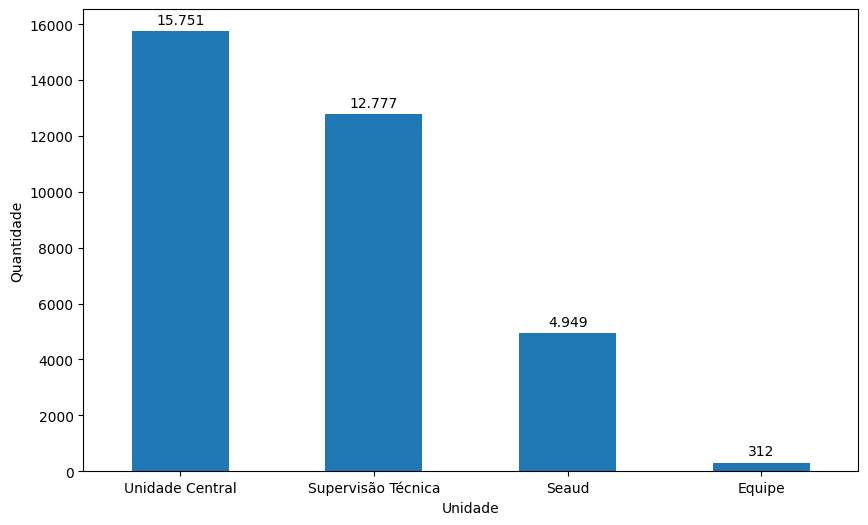

In [7]:
# Contagem de valores por 'Destino_2'
contagem_destino_2 = df_analises['Destino_2'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_destino_2.plot(kind='bar')

# Título e rótulos
#plt.title('Contagem de Análises por Unidade')
plt.xlabel('Unidade')
plt.ylabel('Quantidade')

# Ajustar os rótulos do eixo X para horizontal
plt.xticks(rotation=0)

# Adicionar os valores acima das barras
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(v):,}'.replace(',', '.') for v in container.datavalues], padding=3)

# salvar o gráfico em uma figura
plt.savefig('analises_unidade.png', format='png')

In [9]:
porcentagem_destino_2 = df_analises['Destino_2'].value_counts(normalize=True) * 100

# Exibir as porcentagens
print(porcentagem_destino_2.round(2))

Destino_2
Unidade Central       46.62
Supervisão Técnica    37.81
Seaud                 14.65
Equipe                 0.92
Name: proportion, dtype: float64


In [8]:
# Contagem de valores por 'Tipo_relatório'
contagem_Tipo_relatório = df_analises['Tipo_relatório'].value_counts()

# Exibir a contagem
print(contagem_Tipo_relatório)

Tipo_relatório
Relatório Final         19208
Relatório Analítico      9023
Relatório Preliminar     5558
Name: count, dtype: int64


In [12]:
# Agrupar por 'Tipo_relatório' e calcular a contagem e a média de 'tempo_2'
resultado_unidade = df_analises.groupby('Tipo_relatório').agg(
    Quantitativo=('Tipo_relatório', 'count'),
    Media_Duracao=('tempo_2', 'mean')
).reset_index()

resultado_unidade['Media_Duracao'] = resultado_unidade['Media_Duracao'].round(2)

# Exibir o resultado
print(resultado_unidade)

         Tipo_relatório  Quantitativo  Media_Duracao
0   Relatório Analítico          9023           2.03
1       Relatório Final         19208           2.01
2  Relatório Preliminar          5558           2.50


In [14]:
df_analises_2 = df_analises[['Destino_2', 'Tipo_relatório', 'tempo_2']]
df_analises_2.head()

,Destino_2,Tipo_relatório,tempo_2
0,Supervisão Técnica,Relatório Final,1.0
1,Seaud,Relatório Final,1.0
2,Unidade Central,Relatório Final,1.0
3,Seaud,Relatório Final,1.0
4,Supervisão Técnica,Relatório Final,1.0


In [15]:
df_analises_2.describe()

,tempo_2
count,33789.000000
mean,2.097323
std,8.892495
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1043.000000


In [16]:
# Agrupar por 'Destino_2' (Unidade) e 'Tipo_relatório' e calcular contagem e média de 'Tempo na análise'
media_duracao_dias = df_analises.groupby(['Destino_2', 'Tipo_relatório']).agg(
    Media_Duracao=('tempo_2', 'mean')
).reset_index()

# Arredondar a coluna 'Media_Duracao' para duas casas decimais
media_duracao_dias['Media_Duracao'] = media_duracao_dias['Media_Duracao'].round(2)

# Exibir o resultado
print(media_duracao_dias)

             Destino_2        Tipo_relatório  Media_Duracao
0               Equipe   Relatório Analítico           1.14
1               Equipe       Relatório Final           1.44
2               Equipe  Relatório Preliminar           1.55
3                Seaud   Relatório Analítico           1.10
4                Seaud       Relatório Final           1.57
5                Seaud  Relatório Preliminar           1.20
6   Supervisão Técnica   Relatório Analítico           1.51
7   Supervisão Técnica       Relatório Final           1.40
8   Supervisão Técnica  Relatório Preliminar           2.22
9      Unidade Central   Relatório Analítico           2.76
10     Unidade Central       Relatório Final           2.64
11     Unidade Central  Relatório Preliminar           3.20


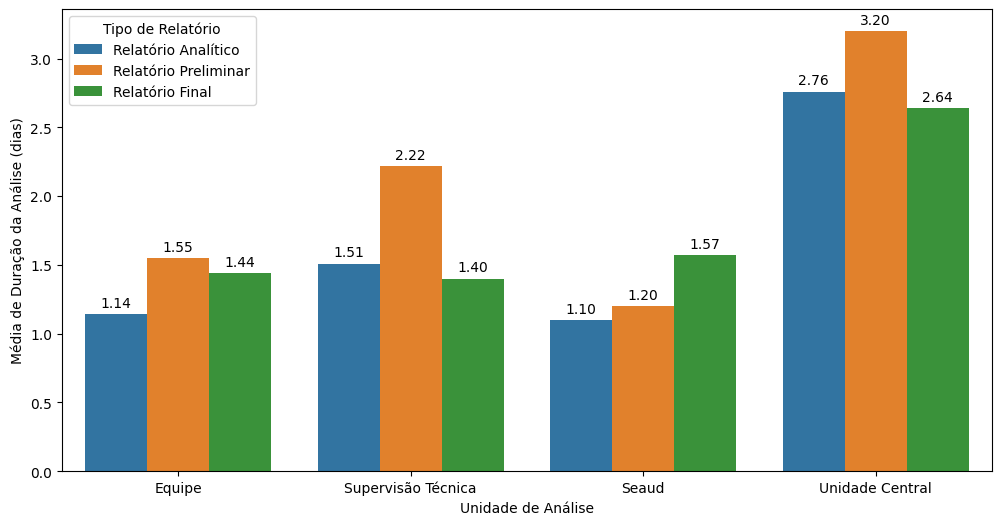

In [17]:
# Ordenar o DataFrame com base na ordem desejada
unidades_ordenadas = ["Equipe", "Supervisão Técnica", "Seaud", "Unidade Central"]
tipos_relatorio_ordenados = ["Relatório Analítico", "Relatório Preliminar", "Relatório Final"]

# Filtrar e ordenar o DataFrame
media_duracao_dias['Destino_2'] = pd.Categorical(media_duracao_dias['Destino_2'], categories=unidades_ordenadas, ordered=True)
media_duracao_dias['Tipo_relatório'] = pd.Categorical(media_duracao_dias['Tipo_relatório'], categories=tipos_relatorio_ordenados, ordered=True)

# Ordenar o DataFrame de acordo com as categorias especificadas
media_duracao_dias = media_duracao_dias.sort_values(by=['Destino_2', 'Tipo_relatório'])

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=media_duracao_dias, x="Destino_2", y="Media_Duracao", hue="Tipo_relatório")

# Personalizar o gráfico
#plt.title("Média de Duração por Unidade e Tipo de Relatório")
plt.xlabel("Unidade de Análise")
plt.ylabel("Média de Duração da Análise (dias)")
plt.legend(title="Tipo de Relatório")
plt.xticks(rotation=0)  # Manter o eixo x na horizontal

# Exibir valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)  # Exibir valores com duas casas decimais

# salvar o gráfico em uma figura
plt.savefig('media_analises_unidade.png', format='png')

In [22]:
# Contagem de quantas análises duram 1 dia
contagem_1 = (df_analises['tempo_2'] == 1).sum()
print(contagem_1)

26436


In [24]:
# Contar o total de valores na coluna 'tempo_2'
total_valores = df_analises['tempo_2'].count()

# Calcular a porcentagem
porcentagem = (contagem_1 / total_valores) * 100

# Exibir o resultado
print(f"Porcentagem de análises de 1 dia: {porcentagem:.2f}%")

Porcentagem de análises de 1 dia: 78.24%


## Código não usado

In [ ]:
# coluna com os dados
#tempo_analises = df_analises_2['tempo_2']

# Calcular os quartis
#q1_analise = np.percentile(tempo_analises, 25)
#q2_analise = np.percentile(tempo_analises, 50)  # Também a mediana
#q3_analise = np.percentile(tempo_analises, 75)

# Plotar a curva de densidade
#plt.figure(figsize=(10, 6))
#sns.kdeplot(tempo_analises, shade=True, color="blue")

# Adicionar os quartis ao gráfico
#plt.axvline(q1, color='red', linestyle='--', label=f"1º Quartil (25%) = {q1:.2f}")
#plt.axvline(q2, color='green', linestyle='--', label=f"Mediana (50%) = {q2:.2f}")
#plt.axvline(q3, color='orange', linestyle='--', label=f"3º Quartil (75%) = {q3:.2f}")

# Customizar o gráfico
#plt.title("Distribuição do Tempo de Análise dos Relatórios")
#plt.xlabel("Dias")
#plt.ylabel("Densidade")
#plt.legend()

# Mostrar o gráfico
#plt.show()

In [ ]:
# Definir limites para outliers
#IQR_analise = q3_analise - q1_analise
#limite_inferior_analise = q1_analise - 1.5 * IQR_analise
#limite_superior_analise = q3_analise + 1.5 * IQR_analise

# Identificar outliers
#outliers_analise = df_analises_2[(df_analises_2['tempo_2'] < limite_inferior_analise) | (df_analises_2['tempo_2'] > limite_superior_analise)]

#print(q1_analise)
#print(q3_analise)
#print(IQR_analise)
#print(outliers_analise)


In [ ]:
# Remover outliers
#df_analises_sem_outliers = df_analises_2[(df_analises_2['tempo_2'] >= limite_inferior_analise) & (df_analises_2['tempo_2'] <= limite_superior_analise)]
#analise_sem_outliers = df_analises_sem_outliers['tempo_2']

# Plotar a curva de densidade
#plt.figure(figsize=(10, 6))
#sns.kdeplot(analise_sem_outliers, shade=True, color="blue")

# Adicionar os quartis ao gráfico
#plt.axvline(q1, color='red', linestyle='--', label=f"1º Quartil (25%) = {q1:.2f}")
#plt.axvline(q2, color='green', linestyle='--', label=f"Mediana (50%) = {q2:.2f}")
#plt.axvline(q3, color='orange', linestyle='--', label=f"3º Quartil (75%) = {q3:.2f}")

# Customizar o gráfico
#plt.title("Distribuição do Tempo de Análise dos Relatórios (sem outliers)")
#plt.xlabel("Dias")
#plt.ylabel("Densidade")
#plt.legend()

# Mostrar o gráfico
#plt.show()

In [ ]:
#df_analises_sem_outliers.describe()